# Linear Regression

In [65]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import sklearn.linear_model as skl_lm
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [31]:
data = pd.read_csv("C:\\Users\\u23e00\\Downloads\\housing.csv")
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


#### Features:

* RM: average number of rooms per dwelling
* LSTAT: percentage of population considered lower status
* PTRATIO: pupil-teacher ratio by town

#### Target Variable

* MEDV: median value of owner-occupied homes

In [32]:
# Perform Linear Regression 
data1 = data.drop(["LSTAT","PTRATIO"], axis=1)
data1.head()

,RM,MEDV
0,6.575,504000.0
1,6.421,453600.0
2,7.185,728700.0
3,6.998,701400.0
4,7.147,760200.0


In [33]:
X = data1.drop("MEDV", axis=1)
y = data1["MEDV"]

In [34]:
X_train,X_test, y_train,y_test = train_test_split(X , y, random_state=20, test_size=0.2)

Text(0, 0.5, 'MEDV')

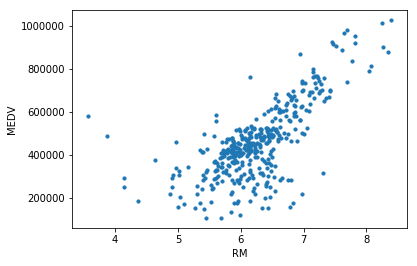

In [35]:
# data points
plt.scatter(X_train, y_train, s=10)
plt.xlabel('RM')
plt.ylabel('MEDV')

In [36]:
# Model initialization
regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
# Predict
y_predicted = regression_model.predict(X_test)

In [38]:
# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [39]:
# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [181348.38471732]
Intercept: -676535.3166882896
Root mean squared error:  11979750283.736553
R2 score:  0.39049587778907147


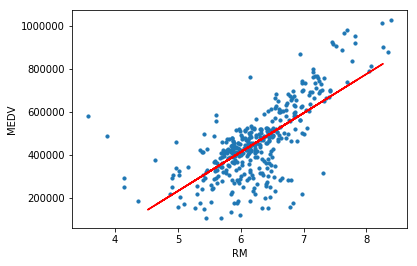

In [40]:
# data points
plt.scatter(X_train, y_train, s=10)
plt.xlabel('RM')
plt.ylabel('MEDV')

# predicted values
plt.plot(X_test, y_predicted, color='r')
plt.show()

### Ordinary least squares (OLS)

In [27]:
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     4318.
Date:                Tue, 25 Jun 2019   Prob (F-statistic):          4.80e-213
Time:                        10:23:49   Log-Likelihood:                -5188.8
No. Observations:                 391   AIC:                         1.038e+04
Df Residuals:                     390   BIC:                         1.038e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM           7.43e+04   1130.714     65.711      0.000    7.21e+04    7.65e+04
==============================================================================
Omnibus:                        9.649   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.237
Skew:                           0.312   Prob(JB):                      0.00599
Kurtosis:                       3.489   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

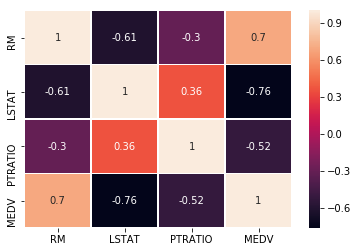

In [49]:
corr = data.corr()
sns.heatmap(corr,linewidths=.5,annot=True)
plt.show()

## Multiple Linear Regression

In [58]:
multi_reg = skl_lm.LinearRegression()

X = scale(data[['RM', 'LSTAT']])
y = data.MEDV

multi_reg.fit(X,y)
print(multi_reg.coef_)
print(multi_reg.intercept_)

[ 61179.39638949 -88196.91182264]
454342.94478527614


In [61]:
# use the max/min value to plot
data[['RM', 'LSTAT']].describe()

,RM,LSTAT
count,489.000000,489.000000
mean,6.240288,12.939632
std,0.643650,7.081990
min,3.561000,1.980000
25%,5.880000,7.370000
50%,6.185000,11.690000
75%,6.575000,17.120000
max,8.398000,37.970000


In [71]:
# Create a coordinate grid
RM = np.arange(0,10)
LSTAT = np.arange(0,40)

B1, B2 = np.meshgrid(LSTAT, RM, indexing='xy')
Z = np.zeros((RM.size, LSTAT.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(multi_reg.intercept_ + B1[i,j]*multi_reg.coef_[0] + B2[i,j]*multi_reg.coef_[1])

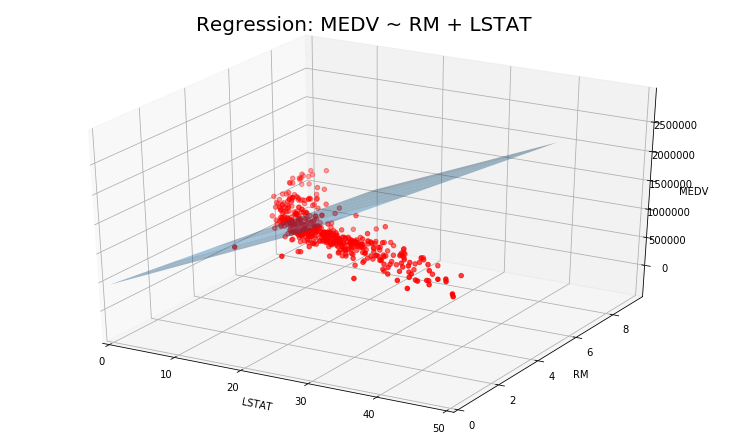

In [75]:
# Create plot
import warnings
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: MEDV ~ RM + LSTAT ', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(data.LSTAT, data.RM, data.MEDV, c='r')

ax.set_xlabel('LSTAT')
ax.set_xlim(0,50)
ax.set_ylabel('RM')
ax.set_ylim(ymin=0)
ax.set_zlabel('MEDV')
plt.show()